In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('divorce.csv', sep=';')
print(df.head())

   Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0     2     2     4     1     0     0     0     0     0      0  ...      2   
1     4     4     4     4     4     0     0     4     4      4  ...      2   
2     2     2     2     2     1     3     2     1     1      2  ...      3   
3     3     2     3     2     3     3     3     3     3      3  ...      2   
4     2     2     1     1     1     1     0     0     0      0  ...      2   

   Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  Class  
0      1      3      3      3      2      3      2      1      1  
1      2      3      4      4      4      4      2      2      1  
2      2      3      1      1      1      2      2      2      1  
3      2      3      3      3      3      2      2      2      1  
4      1      2      3      2      2      2      1      0      1  

[5 rows x 55 columns]


In [3]:
df.shape

(170, 55)

In [6]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_X_train = X_train
lr_X_test = X_test
lr_y_train = y_train
lr_y_test = y_test

for solver in solvers:
    lr = LogisticRegression(solver= solver, multi_class= 'ovr')
    lr.fit(lr_X_train, lr_y_train)
    lr_pred = lr.predict(lr_X_test)
    print ('Solver: ' + solver)
    print('Accuracy Score: {0:.3f}\n'.format(lr.score(lr_X_test, lr_y_test)))

Solver: newton-cg
Accuracy Score: 0.980

Solver: lbfgs
Accuracy Score: 0.980

Solver: liblinear
Accuracy Score: 0.980

Solver: sag
Accuracy Score: 0.980

Solver: saga
Accuracy Score: 0.980



/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [9]:
lr = LogisticRegression(solver= 'newton-cg', multi_class= 'ovr')
lr.fit(lr_X_train, lr_y_train)
lr_pred = lr.predict(lr_X_test)

print(classification_report(lr_y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        28

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



In [10]:
from sklearn.naive_bayes import GaussianNB

nbc_X_train = X_train
nbc_X_test = X_test
nbc_y_train = y_train
nbc_y_test = y_test

nbc = GaussianNB()
nbc.fit(nbc_X_train, nbc_y_train)
nbc_pred = nbc.predict(nbc_X_test)
print('Accuracy Score: {0:.3f}'.format(nbc.score(nbc_X_test, nbc_y_test)))

Accuracy Score: 0.980


In [11]:
print(classification_report(nbc_y_test,nbc_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        28

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_error_rate = []
knn_score = []

knn_X_train = X_train
knn_X_test = X_test
knn_y_train = y_train
knn_y_test = y_test

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(knn_X_train, knn_y_train)
    knn_pred = knn.predict(knn_X_test)
    knn_error_rate.append(np.mean(knn_pred != knn_y_test))
    knn_score.append(knn.score(knn_X_test, knn_y_test))

Text(0, 0.5, 'Error Rate')

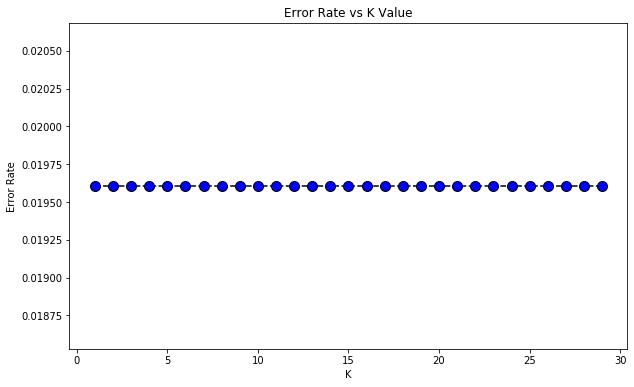

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_error_rate, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Score')

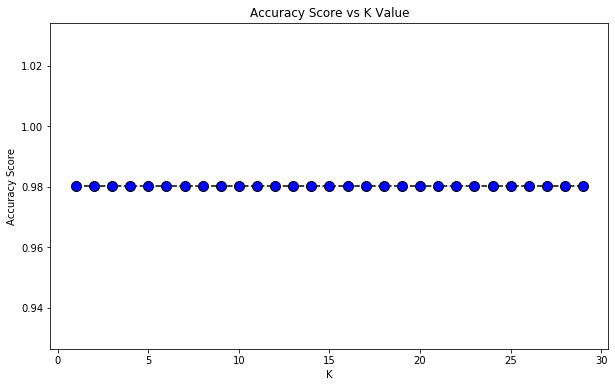

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_score, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Score vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [16]:
print('K: ' + str(2))
print('Accuracy Score: {0:.3f}'.format(knn_score[1]))
print('Error Rate: {0:.3f}\n'.format(knn_error_rate[1]))

K: 2
Accuracy Score: 0.980
Error Rate: 0.020



In [17]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(knn_X_train, knn_y_train)
knn_pred = knn.predict(knn_X_test)

print(classification_report(knn_y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        28

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



## Dividindo a Base de Dados

In [ ]:
df_med = df.drop('Class', axis = 1).mean()

In [ ]:
divorce = df[df['Class'] == 1]
divorce.tail()

In [ ]:
married = df[df['Class'] == 0]
married.head()

In [ ]:
divorce_med = divorce.drop('Class', axis = 1).mean()
divorce_med = divorce_med.sort_values(ascending=False)
print(divorce_med.head(10))
print(divorce_med.tail())

In [ ]:
divorce_mode = divorce.drop('Class', axis = 1).mode()
#divorce_med = divorce_med.sort_values(ascending=False)
#print(divorce_med.head())
#print(divorce_med.tail())
print(divorce_mode)

In [ ]:
married_med = married.drop('Class', axis = 1).mean()
married_med = married_med.sort_values(ascending=False)
print(married_med.head())
print(married_med.tail())

In [ ]:
married_mode = married.drop('Class', axis = 1).mode()
print(married_mode)